<a href="https://colab.research.google.com/github/anushaobulapuram/house_price_prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
!mkdir -p data
!cp "/content/drive/MyDrive/House_Price_Prediction data/House_Price_Prediction.csv" data/

In [1]:
import numpy as np
import pandas as pd

In [46]:
df=pd.read_csv("data/House_Price_Prediction.csv")
df.head()

,House_ID,Square_Feet,Bedrooms,Bathrooms,Location,Year_Built,Lot_Size,Garage,Condition,Price
0,26d04562-1eeb-4986-a4bf-59ba2cb10e94,3030.0,3,3.0,Urban,1961,2763.0,1,Poor,179761
1,a298dcab-9199-4376-a275-12800ab1d071,3895.0,4,4.0,Suburban,1964,6578.0,0,Fair,950495
2,cf5adf32-2581-46d9-8df4-1bd13fccaabd,4280.0,5,4.0,Suburban,1917,2955.0,1,Good,481378
3,ee9a8f2a-b552-49d9-94bd-99dbda648221,1792.0,2,2.0,Suburban,2013,1773.0,1,New,176038
4,048d7e35-fb42-41b0-984f-03d7c45ee5a2,4144.0,2,3.0,Suburban,1944,NaN,1,New,510664


In [47]:
df.shape

(955, 10)

In [48]:
data_cols=df.columns.tolist()
print(data_cols)

['House_ID', 'Square_Feet', 'Bedrooms', 'Bathrooms', 'Location', 'Year_Built', 'Lot_Size', 'Garage', 'Condition', 'Price']


In [49]:
df.dtypes

,0
House_ID,object
Square_Feet,float64
Bedrooms,int64
Bathrooms,float64
Location,object
Year_Built,int64
Lot_Size,float64
Garage,int64
Condition,object
Price,int64


In [50]:




df.describe()

,Square_Feet,Bedrooms,Bathrooms,Year_Built,Lot_Size,Garage,Price
count,886.000000,955.000000,905.000000,955.000000,899.000000,955.000000,955.000000
mean,2872.130926,2.993717,2.487293,1961.062827,5408.243604,0.501571,551351.303665
std,1257.083093,1.397798,1.140614,35.767304,2620.715184,0.500260,265849.776554
min,502.000000,1.000000,1.000000,1900.000000,1018.000000,0.000000,100257.000000
25%,1843.750000,2.000000,1.000000,1930.000000,3043.500000,0.000000,324111.500000
50%,2972.000000,3.000000,3.000000,1961.000000,5307.000000,1.000000,540153.000000
75%,3921.000000,4.000000,4.000000,1992.500000,7756.000000,1.000000,789616.000000
max,4992.000000,5.000000,4.000000,2021.000000,9992.000000,1.000000,999500.000000


In [51]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   House_ID     955 non-null    object 
 1   Square_Feet  886 non-null    float64
 2   Bedrooms     955 non-null    int64  
 3   Bathrooms    905 non-null    float64
 4   Location     955 non-null    object 
 5   Year_Built   955 non-null    int64  
 6   Lot_Size     899 non-null    float64
 7   Garage       955 non-null    int64  
 8   Condition    955 non-null    object 
 9   Price        955 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 74.7+ KB


In [52]:
df.isnull().sum()

,0
House_ID,0
Square_Feet,69
Bedrooms,0
Bathrooms,50
Location,0
Year_Built,0
Lot_Size,56
Garage,0
Condition,0
Price,0


In [53]:
df.drop(columns=['House_ID','Year_Built'],inplace=True)

In [54]:
num_columns=df.select_dtypes(include=['float64','int64']).columns
cat_columns=df.select_dtypes(include=['object']).columns

In [55]:
df[num_columns]=df[num_columns].fillna(df[num_columns].mean())
df[cat_columns]=df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [56]:
df.isnull().sum()

,0
Square_Feet,0
Bedrooms,0
Bathrooms,0
Location,0
Lot_Size,0
Garage,0
Condition,0
Price,0


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
label_encoder = LabelEncoder()
for column in cat_columns:
  df[column]=label_encoder.fit_transform(df[column])

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler=MinMaxScaler()
df[num_columns]=scaler.fit_transform(df[num_columns])

In [61]:

x=df.drop('Price',axis=1)
y=df['Price']

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
linreg_model=LinearRegression()
linreg_model.fit(x_train,y_train)

LinearRegression()

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [65]:
linreg_pred=linreg_model.predict(x_test)
linreg_mse=mean_squared_error(y_test,linreg_pred)
linreg_mae=mean_absolute_error(y_test,linreg_pred)
linreg_r2=r2_score(y_test,linreg_pred)

In [66]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.08568517721660691
Mean Absolute Error: 0.253021599482764
R-squared: -0.005606932987245683


In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [69]:
rf_pred=rf_model.predict(x_test)
rf_mse=mean_squared_error(y_test,rf_pred)
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_r2=r2_score(y_test,rf_pred)

In [70]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.09332245552579009
Mean Absolute Error: 0.261775945483593
R-squared: -0.0952385386668706


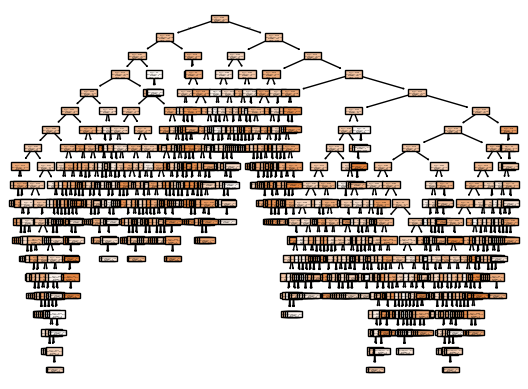

In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(rf_model.estimators_[0],filled=True)
plt.show()

In [72]:
best_model=linreg_model if linreg_mse < rf_mse else rf_model


In [73]:
import pickle

In [74]:
with open('best_model.pkl','wb') as file:
  pickle.dump(best_model,file)
print("best model saved as 'best_model.pkl' ")

best model saved as 'best_model.pkl' 


In [75]:
import gradio as gr
import pandas as pd
import numpy as py
import pickle
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [76]:
print("Loading data and recreating preprocessors..")
df_setup=pd.read_csv('/content/drive/MyDrive/House_Price_Prediction data/House_Price_Prediction.csv')

Loading data and recreating preprocessors..


In [77]:
target_col='Price'
cols_to_drop=['House_ID','Year_Built']

In [78]:
if target_col in df_setup.columns:
  x_ref=df_setup.drop(columns=[target_col])
else:
  x_ref=df_setup.copy()
existing_drop=[c for c in cols_to_drop if c in x_ref.columns]
if existing_drop:
  x_ref.drop(columns=existing_drop,inplace=True)
num_cols=x_ref.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols=x_ref.select_dtypes(include=['object']).columns.tolist()


In [79]:
encoders={}
scaler=MinMaxScaler()

In [80]:
for col in cat_cols:
  le=LabelEncoder()
  x_ref[col]=x_ref[col].fillna(x_ref[col].mode().iloc[0])
  x_ref[col]=le.fit_transform(x_ref[col])
  encoders[col]=le

In [81]:
x_ref[num_cols]=x_ref[num_cols].fillna(x_ref[num_cols].mean())
scaler.fit(x_ref[num_cols])

MinMaxScaler()

In [82]:
with open('best_model.pkl','rb') as file:
  model=pickle.load(file)
print("Setup complete.launching UI . .")

Setup complete.launching UI . .


In [83]:
def predict_outcome(*args):
  input_data=pd.DataFrame([args],columns=cat_cols+num_cols)
  for col in cat_cols:
    val=input_data[col].iloc[0]
    if pd.isna(val):
      val=df_setup[col].mode().iloc[0]
    try:
      input_data[col]=encoders[col].transform([val])
    except ValueError:
      input_data[col]=0
  input_data[num_cols]=input_data[num_cols].fillna(df_setup[num_cols].mean().iloc[0])
  input_data[num_cols]=scaler.transform(input_data[num_cols])
  input_data=input_data[x_ref.columns]
  prediction = model.predict(input_data)
  return f"Predicted Target: {prediction[0]}"

In [86]:
ui_inputs=[]
original_df = pd.read_csv("data/House_Price_Prediction.csv")
for col in cat_cols:
 unique_vals = original_df[col].dropna().unique().tolist()
 ui_inputs.append(gr.Dropdown(choices=unique_vals, label=f"{col}(Select Option)"))
for col in num_cols:
 ui_inputs.append(gr.Number(label=f"{col} (Enter Number)"))

In [87]:
iface = gr.Interface(
 fn=predict_outcome,
 inputs=ui_inputs,
 outputs="text",
 title="Classifier Prediction App",
 description="Enter the feature values below to get a prediction from the best model."
)
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f8a643e691775a4ff9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [88]:
!touch .gitignore

In [89]:
!echo "data/" >> .gitignore
!echo "*.csv" >> .gitignore